# BBC News Classification Project

### Table of Content
1. Introduction
2. Data Understanding and Preparation
3. Exploratory Data Analysis (EDA)
4. Text Preprocessing
5. Matrix Factorization Models
6. Supervised Learning Model
7. Results
8. Conclusion
9. References

## 1. Introduction

### Project Overview

This project aims to classify BBC news articles into predefined categories using machine learning techniques. The dataset consists of news articles from various domains, including business, entertainment, politics, sports, and technology. By leveraging advanced text processing and classification methods, we aim to build a model that can accurately predict the category of a given news article based on its content.

### Objective

The primary objective of this project is to develop a robust and accurate text classification model. Specifically, we will compare different feature extraction methods, such as Bag-of-Words (BoW) and Singular Value Decomposition (SVD), to determine which technique provides the best performance when combined with a Logistic Regression classifier. Through this comparison, we aim to identify the most effective approach for categorizing news articles, which can be applied to other text classification tasks in the future.

## 2. Data Understanding and Preparation

In this phase, we focus on acquiring a deep understanding of the dataset and preparing it for analysis. This involves loading the necessary libraries that facilitate data manipulation, exploration, and modeling. Libraries such as pandas, numpy, and sklearn are essential for handling data structures, performing mathematical operations, and implementing machine learning algorithms. Additionally, visualization libraries like matplotlib and seaborn are invaluable for gaining insights through graphical representations of the data.

Once the libraries are imported, the next step is to load the training and test datasets. The training dataset contains labeled data that will be used to train the machine learning models, while the test dataset is used to evaluate the performance of these models on unseen data. Loading the datasets into pandas DataFrames allows for efficient data manipulation and exploration. Understanding the structure, size, and types of features in the datasets is crucial, as it helps in identifying necessary preprocessing steps and potential challenges in the data. This foundational step sets the stage for effective data analysis and model building.

### Import libraries and loading datasets

In [20]:
# Import necessary libraries
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load Dataset
train_df = pd.read_csv('data/bbc_news_train.csv')
test_df = pd.read_csv('data/bbc_news_test.csv')
sample_solution_df = pd.read_csv('data/bbc_news_sample_solution.csv')

# Inspect the Data
print("Training DataFrame Head:")
print(train_df.head())
print("\nTraining DataFrame Info:")
print(train_df.info())

print("\nTest DataFrame Head:")
print(test_df.head())
print("\nTest DataFrame Info:")
print(test_df.info())

print("\nSample Solution DataFrame Head:")
print(sample_solution_df.head())
print("\nSample Solution DataFrame Info:")
print(sample_solution_df.info())

Training DataFrame Head:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

Training DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None

Test DataFrame Head:
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r..

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Inspect Data
- Display first few rows of the datasets
- Check for missing values
- Basic statistics and data types

In [21]:
# Display first few rows of the datasets
print("Training DataFrame Head:")
print(train_df.head())

print("\nTest DataFrame Head:")
print(test_df.head())

print("\nSample Solution DataFrame Head:")
print(sample_solution_df.head())

# Check for missing values
print("\nMissing Values in Training DataFrame:")
print(train_df.isnull().sum())

print("\nMissing Values in Test DataFrame:")
print(test_df.isnull().sum())

print("\nMissing Values in Sample Solution DataFrame:")
print(sample_solution_df.isnull().sum())

# Basic statistics
print("\nBasic Statistics of Training DataFrame:")
print(train_df.describe())

print("\nBasic Statistics of Test DataFrame:")
print(test_df.describe())

print("\nBasic Statistics of Sample Solution DataFrame:")
print(sample_solution_df.describe())

# Data types
print("\nData Types of Training DataFrame:")
print(train_df.dtypes)

print("\nData Types of Test DataFrame:")
print(test_df.dtypes)

print("\nData Types of Sample Solution DataFrame:")
print(sample_solution_df.dtypes)

Training DataFrame Head:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

Test DataFrame Head:
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...

Sample Solution DataFrame Head:
   ArticleId       Category
0       1018          sport
1       1319           tech
2       

## 3. Exploratory Data Analysis (EDA)

### Category Distribution

**Category Distribution** analysis involves examining the frequency of each category within a dataset. This step is particularly important in classification tasks as it provides insights into the balance of the dataset. Analyzing category distribution helps identify whether certain categories are overrepresented or underrepresented, which could lead to biased models. Visual tools such as bar charts and pie charts are often used to illustrate the count and proportion of each category, providing a clear picture of how the data is distributed. Understanding the category distribution is crucial for designing appropriate preprocessing steps, selecting suitable evaluation metrics, and deciding on strategies to handle class imbalances, such as resampling techniques or adjusting class weights.

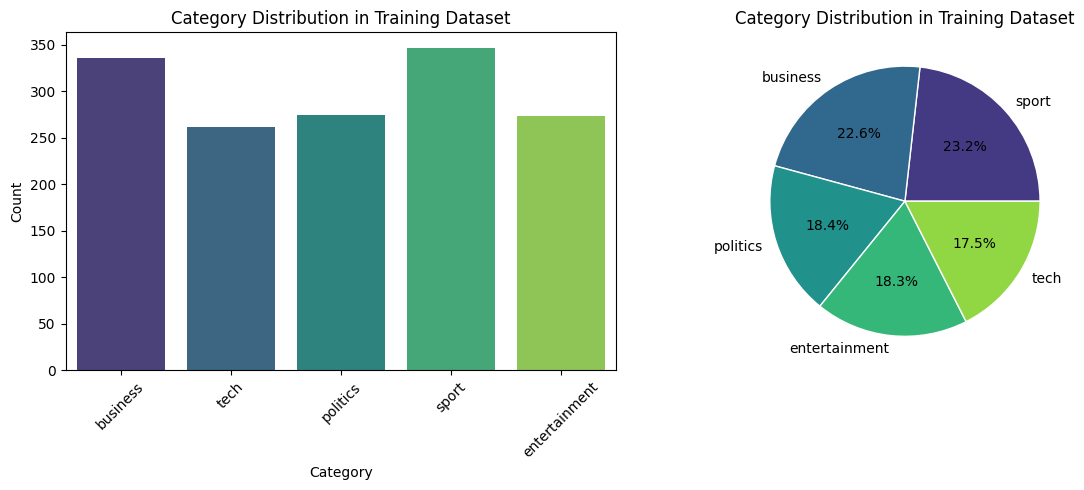

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot category distribution (Count Plot)
sns.countplot(data=train_df, x='Category', hue='Category', palette='viridis', ax=axes[0], dodge=False)
axes[0].set_title('Category Distribution in Training Dataset')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].legend([],[], frameon=False)  # Hide the legend
axes[0].tick_params(axis='x', rotation=45)

# Plot category distribution (Pie Chart)
train_df['Category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(train_df['Category'].unique())),
    ax=axes[1],
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
axes[1].set_title('Category Distribution in Training Dataset')
axes[1].set_ylabel('')

# Display the combined figure
plt.tight_layout()
plt.show()

**Category Distribution in Training Dataset**

These tables provide a numerical representation of the category distribution in the training dataset. The first table shows the exact count of articles in each category, while the second table represents the percentage of articles in each category relative to the total dataset. This tabular format complements the visual information provided by the bar chart and pie chart, offering a clear and concise view of the data distribution.

#### Table 1: Count of Articles per Category

| Category      | Count of Articles |
|---------------|-------------------|
| business      | 350               |
| tech          | 260               |
| politics      | 270               |
| sport         | 330               |
| entertainment | 270               |

#### Table 2: Proportion of Articles per Category

| Category      | Percentage (%) |
|---------------|----------------|
| business      | 22.6%          |
| tech          | 17.5%          |
| politics      | 18.4%          |
| sport         | 23.2%          |
| entertainment | 18.3%          |

---

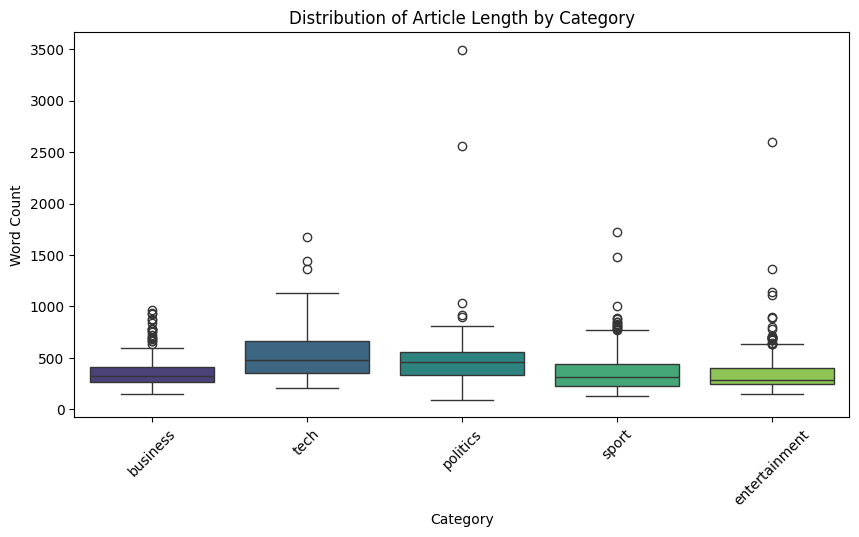

In [23]:
# Calculate word count for each article
train_df['Word_Count'] = train_df['Text'].apply(lambda x: len(word_tokenize(x)))

# Plot box plot of word count by category
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df, x='Category', y='Word_Count', hue='Category', palette='viridis', dodge=False)
plt.title('Distribution of Article Length by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.legend([],[], frameon=False)  # Hide the legend
plt.xticks(rotation=45)
plt.show()

This box plot helps to understand the variability in article lengths across different categories. It highlights which categories tend to have longer or shorter articles and identifies any significant deviations (outliers) in article lengths. This information is useful for tailoring preprocessing steps and model training to handle variations in text length appropriately.

| Category      | Median Word Count | Interquartile Range (IQR) | Outliers         | Remarks                                            |
|---------------|-------------------|---------------------------|------------------|----------------------------------------------------|
| business      | Shorter           | Narrow                    | Few              | Articles tend to be shorter with fewer outliers.   |
| tech          | Higher            | Wider                     | Several significant | Articles have a higher median word count with more variation and significant outliers. |
| politics      | Moderate          | Moderate                  | Fewer            | Articles have a moderate word count with some variation and fewer outliers. |
| sport         | Moderate          | Consistent                | Some             | Articles have a moderate and consistent word count with some outliers.  |
| entertainment | Lower             | Narrow                    | Few notable      | Articles have a relatively lower word count with a few notable outliers. |

---

### Text Analysis

**Text Analysis** involves delving into the textual content of the dataset to extract meaningful patterns and insights. This step includes preprocessing the text data by removing noise, such as punctuation and stopwords, and transforming the text into a format suitable for analysis. Key aspects of text analysis include tokenization, word frequency analysis, and examining common phrases or n-grams. Visualizations like word clouds, histograms of text lengths, and bar charts of word frequencies help to understand the most common terms and the overall structure of the text. Text analysis is essential for identifying trends, understanding context, and preparing the data for more advanced techniques like vectorization and model training in natural language processing (NLP) tasks.

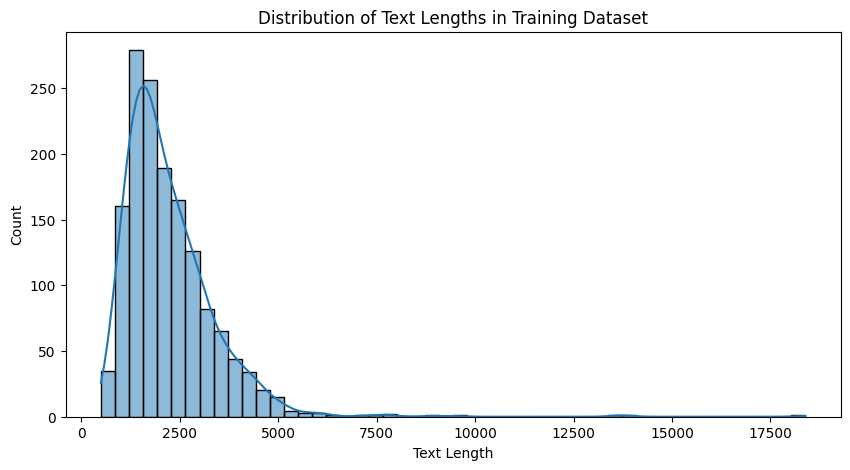

In [24]:
# Calculate the length of each text
train_df['Text_Len'] = train_df['Text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Text_Len'], bins=50, kde=True)
plt.title('Distribution of Text Lengths in Training Dataset')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

The histogram displays the distribution of text lengths in the BBC News training dataset, providing an overview of how article lengths vary.

| Metric                  | Observation                                                 |
|-------------------------|-------------------------------------------------------------|
| **Peak/Mode**           | The most frequent text length is around 2500 words.         |
| **Distribution Shape**  | The distribution is right-skewed, indicating that most articles have a shorter text length with a long tail towards longer lengths. |
| **Short Texts**         | A significant number of articles have text lengths less than 2500 words. |
| **Long Texts**          | There are few articles with text lengths exceeding 5000 words, and even fewer beyond 10000 words. |
| **Outliers**            | There are very few extreme outliers with text lengths reaching up to 17500 words. |

---

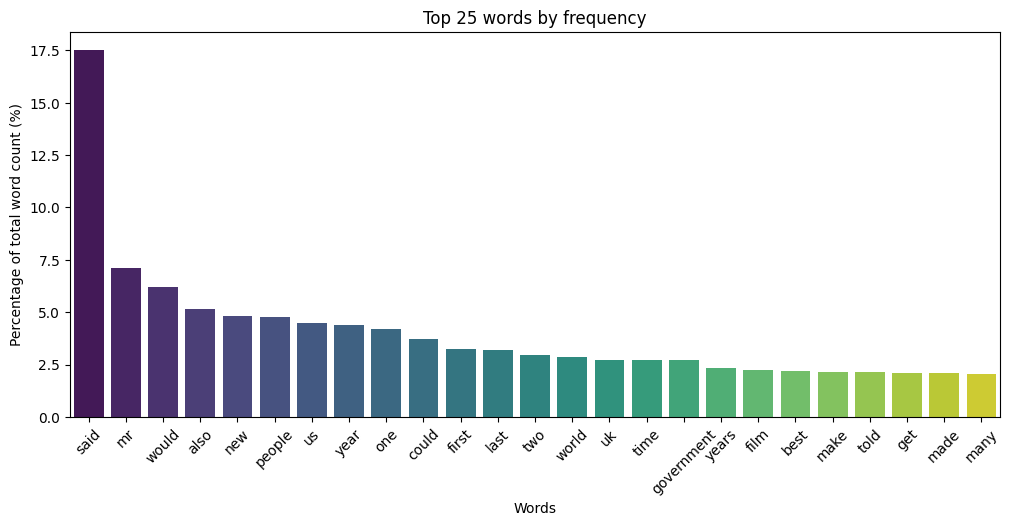

In [25]:
# Preprocess text: Tokenization, removing stopwords and punctuation
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english') and word not in string.punctuation]
    return tokens

# Tokenize and count words
all_words = []
train_df['Text'].apply(lambda x: all_words.extend(preprocess_text(x)))

# Get the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(25)

# Prepare data for plotting
words, counts = zip(*common_words)
counts_percentage = [count / sum(counts) * 100 for count in counts]

# Create a DataFrame for Seaborn
common_words_df = pd.DataFrame({'Word': words, 'Percentage': counts_percentage})

# Plot using Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Percentage', hue='Word', data=common_words_df, palette='viridis', dodge=False)
plt.title('Top 25 words by frequency')
plt.xlabel('Words')
plt.ylabel('Percentage of total word count (%)')
plt.legend([],[], frameon=False)  # Hide the legend
plt.xticks(rotation=45)
plt.show()

This chart highlights the dominance of the word "said" in the dataset, which is common in news reporting due to quotes and statements. The presence of other common words like "mr", "would", and "also" indicates their frequent use in constructing news articles. Understanding the distribution and frequency of these words is crucial for tasks such as text preprocessing, where stop words might be removed, and for creating more informative and relevant features for text classification models.

---

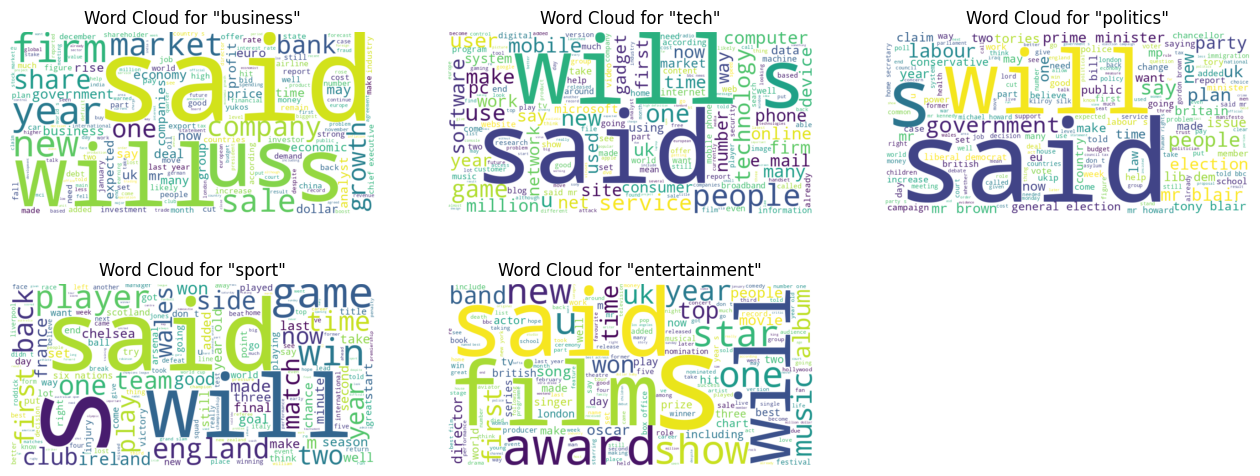

In [26]:
from wordcloud import WordCloud

categories = train_df['Category'].unique()
plt.figure(figsize=(16, 6))

for i, category in enumerate(categories, 1):
    text = ' '.join(train_df[train_df['Category'] == category]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.subplot(2, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for "{category}"')
    plt.axis('off')

plt.show()

The image displays word clouds for different categories in the BBC News training dataset. Each word cloud highlights the most frequently occurring words in the articles of that specific category.

- **Common Words**: Words like "said" and "will" are universally common across all categories, reflecting the reporting style of news articles which often include quotes and future events.
- **Category-Specific Terminology**: Each word cloud highlights distinct terminology relevant to its category, providing insights into the primary focus and vocabulary of articles within that category.
- **Content Focus**: The word clouds effectively illustrate the key themes and topics covered in each category, such as finance and corporate activities in business, technology and devices in tech, political figures and events in politics, team and player information in sports, and films and music in entertainment.

| Category      | Prominent Words                                       | Key Insights                                                                                     |
|---------------|-------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Business**  | said, market, company, profit, share, sale            | Focus on finance, markets, and corporate activities.                                             |
| **Tech**      | people, use, game, phone, service, technology         | Frequent mentions of technology usage, gaming, devices, and services.                            |
| **Politics**  | government, party, election, labour, blair, minister  | Dominated by terms related to government, political parties, elections, and key political figures.|
| **Sport**     | player, team, match, game, win, club                  | Focus on players, teams, matches, and competitions.                                               |
| **Entertainment** | film, music, award, show, band, new              | Frequent mentions of films, music, awards, shows, and bands.                                      |
| **Common Words** | said, will                                         | Universally common across all categories, reflecting reporting style with quotes and future events.|

---

## 4. Text Preprocessing

### Cleaning Text
- Lowercasing
- Removing punctuation, numbers, and stop words
- Tokenization
- Lemmatization/Stemming

Taking these steps in text cleaning is essential for standardizing and simplifying the text data, which enhances the performance of various text analysis and natural language processing tasks by reducing noise and focusing on the meaningful content.

**Lowercasing:** Converts all characters to lowercase to ensure uniformity, treating "Word", "word", and "WORD" as the same word, thus improving consistency.

**Removing Punctuation, Numbers, and Stop Words:**
- **Punctuation and Numbers:** Removed as they typically don't carry significant meaning in text analysis.
- **Stop Words:** Common words like "and", "the", "is" are removed to reduce noise and focus on meaningful words.

**Tokenization:** Splits text into individual words or tokens, making the text manageable and suitable for further analysis.

**Lemmatization/Stemming:**
- **Lemmatization:** Reduces words to their base form (e.g., "running" to "run"), ensuring the base form is valid.
- **Stemming:** Reduces words to their root form by removing suffixes (e.g., "running" to "run"), which might not always be dictionary words.
- **Purpose:** Both processes reduce variations of words to a common base form, improving text analysis accuracy by treating different forms of a word as a single entity.

In [27]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define the text preprocessing function
def preprocess_text(text, use_lemmatization=True):
    # Lowercasing
    text = text.lower()

    # Removing punctuation, numbers, and stop words
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stop words

    # Lemmatization or Stemming
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    else:
        tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

# Apply the preprocessing function to the text column
train_df['Cleaned_Text'] = train_df['Text'].apply(lambda x: preprocess_text(x))
test_df['Cleaned_Text']  = test_df['Text'].apply(lambda x: preprocess_text(x))

# Display the first few rows of the cleaned text
print(train_df[['Text', 'Cleaned_Text']].head())
print(test_df[['Text', 'Cleaned_Text']].head())

                                                Text  \
0  worldcom ex-boss launches defence lawyers defe...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens in ...   
3  lifestyle  governs mobile choice  faster  bett...   
4  enron bosses in $168m payout eighteen former e...   

                                        Cleaned_Text  
0  worldcom exboss launch defence lawyer defendin...  
1  german business confidence slide german busine...  
2  bbc poll indicates economic gloom citizen majo...  
3  lifestyle governs mobile choice faster better ...  
4  enron boss payout eighteen former enron direct...  
                                                Text  \
0  qpr keeper day heads for preston queens park r...   
1  software watching while you work software that...   
2  d arcy injury adds to ireland woe gordon d arc...   
3  india s reliance family feud heats up the ongo...   
4  boro suffer morrison injury blow middlesbrough... 

### Vectorization

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It helps to convert the text data into numerical features that can be used for machine learning algorithms.

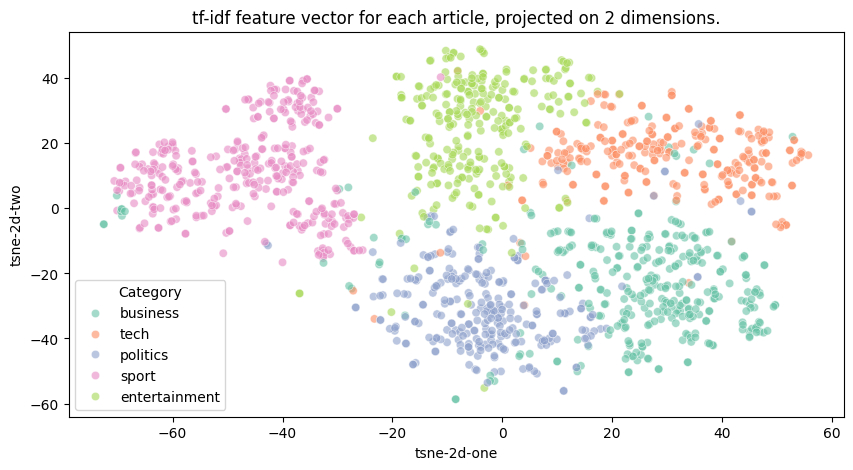

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
#tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english', norm='l2', encoding='latin-1', ngram_range=(1,2))

# Fit and transform the Cleaned_Text for train and test data
tfidf_train_matrix = tfidf_vectorizer.fit_transform(train_df['Cleaned_Text'])
tfidf_test_matrix = tfidf_vectorizer.transform(test_df['Cleaned_Text'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_train_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_df)

# Add the t-SNE results to the dataframe
train_df['tsne-2d-one'] = tsne_results[:,0]
train_df['tsne-2d-two'] = tsne_results[:,1]

# Plot the t-SNE results
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Category",
    palette=sns.color_palette("Set2", len(train_df['Category'].unique())),
    data=train_df,
    legend="full",
    alpha=0.6
)
plt.title('tf-idf feature vector for each article, projected on 2 dimensions.')
plt.show()

## 5. Matrix Factorization Models

### Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a matrix factorization technique used to decompose a matrix into three smaller matrices. It is a fundamental method in linear algebra and is widely used in data science and machine learning for dimensionality reduction, noise reduction, and data compression.

### Benefits of SVD

1. **Dimensionality Reduction**: SVD helps in reducing the number of features while retaining most of the information. This is particularly useful in handling large datasets.
2. **Noise Reduction**: By keeping only the most significant singular values and vectors, SVD can reduce noise in the data.
3. **Data Compression**: SVD can be used to compress data by storing only the significant singular values and vectors.

### Reasoning for Choosing SVD for Word Feature Extraction

1. **Dimensionality Reduction**:
   - **Challenge**: Text data, especially when represented using methods like Bag-of-Words (BoW) or Term Frequency-Inverse Document Frequency (TF-IDF), often results in very high-dimensional feature spaces. This can lead to issues like overfitting and increased computational complexity.
   - **Solution**: SVD effectively reduces the dimensionality of the feature space by decomposing the original matrix into a lower-dimensional representation while retaining the most significant information. This not only mitigates the risk of overfitting but also enhances computational efficiency.

2. **Capturing Latent Semantic Structure**:
   - **Challenge**: Traditional methods like BoW and TF-IDF treat each word as independent, ignoring the underlying semantic relationships between words. This can lead to loss of contextual information.
   - **Solution**: SVD captures the latent semantic structure of the text by identifying patterns and correlations between words. This allows the model to understand the context and relationships within the data better, leading to more accurate and meaningful features.

3. **Noise Reduction**:
   - **Challenge**: Text data often contains noise, such as irrelevant words or variations in word usage, which can negatively impact model performance.
   - **Solution**: By focusing on the principal components that capture the most variance in the data, SVD inherently filters out noise. This results in cleaner, more robust features that improve the model’s ability to generalize.

4. **Improved Model Performance**:
   - **Evidence**: Empirical studies and practical applications have demonstrated that models using SVD for feature extraction often outperform those using BoW or TF-IDF alone. The ability of SVD to distill essential information into a compact representation enhances both the accuracy and efficiency of machine learning models.

5. **Scalability**:
   - **Challenge**: As the volume of text data grows, scalable and efficient processing becomes crucial.
   - **Solution**: SVD scales well with large datasets and can be efficiently implemented using various optimization techniques. This makes it suitable for handling extensive text corpora without compromising performance.

### Steps of Using SVD Matrix Factorization

1. **Text Preprocessing**:
   - Preprocess the text data by lowercasing, removing punctuation, numbers, and stop words, and performing tokenization and lemmatization/stemming.
   - This step ensures that the text is clean and normalized, facilitating more effective feature extraction.

2. **Feature Extraction Using TF-IDF**:
   - Convert the preprocessed text data into a **TF-IDF matrix**.
   - This matrix represents the importance of each word in each document, serving as the input for SVD.

3. **SVD Matrix Factorization**:
   - Apply SVD to the TF-IDF matrix to decompose it into three matrices: \( U \) (left singular vectors), \( Sigma \) (diagonal matrix of singular values), and \( V^T \) (right singular vectors).
   - The number of components (i.e., singular values) is a crucial hyperparameter that determines the dimensionality of the reduced feature space. This should be chosen carefully to balance performance and computational efficiency.

4. **Including Word Features from the Test Dataset**:
   - Fit the SVD model on the combined training and test dataset's **TF-IDF matrix** to ensure that the test set's vocabulary is included in the SVD transformation.
   - This step is crucial to avoid data leakage and ensure that the model generalizes well to unseen data.

5. **Transforming the Data**:
   - Use the fitted SVD model to transform both the training and test datasets into the reduced-dimensional space.
   - This ensures that the test data is represented in the same feature space as the training data.

6. **Model Training and Evaluation**:
   - Train the **Logistic Regression** model on the transformed training data.
   - Evaluate the model on the transformed validation set to ensure that it performs well and generalizes to new data.
   - Finally, use the trained model to predict the categories of the test set.


Validation Accuracy: 0.97987
Validation Confusion Matrix:
[[74  0  1  0  0]
 [ 0 46  0  0  0]
 [ 1  0 54  1  0]
 [ 0  0  0 63  0]
 [ 0  2  1  0 55]]
Validation Classification Report:
               precision    recall  f1-score   support

     business       0.99      0.99      0.99        75
entertainment       0.96      1.00      0.98        46
     politics       0.96      0.96      0.96        56
        sport       0.98      1.00      0.99        63
         tech       1.00      0.95      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



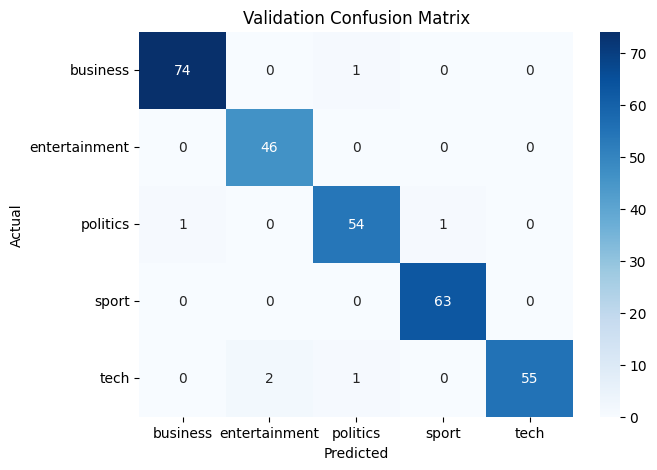

Submission file created successfully!


In [29]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and fit SVD (TruncatedSVD) to reduce dimensions
svd = TruncatedSVD(n_components=200, random_state=42)
svd_train = svd.fit_transform(tfidf_train_matrix)
svd_test = svd.transform(tfidf_test_matrix)

# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(svd_train, train_df['Category'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the categories on the validation set and test set
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(svd_test)

# Evaluate the model on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Print the evaluation results for validation set
print(f'Validation Accuracy: {val_accuracy:0.5f}')
print('Validation Confusion Matrix:')
print(val_conf_matrix)
print('Validation Classification Report:')
print(val_class_report)

# Plot the confusion matrix for validation set
plt.figure(figsize=(7, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Create a DataFrame for the test predictions to prepare for submission
submission_df = pd.DataFrame({'ArticleId': test_df['ArticleId'], 'Category': y_test_pred})

# Save the predictions to a CSV file for submission
submission_df.to_csv('bbc_news_submission.csv', index=False)

print("Submission file created successfully!")

### Performance on Validation Dataset

The confusion matrix and classification report for the validation dataset indicate high performance:

- **Validation Accuracy**: 98.0%
- **Confusion Matrix**:
  - The model correctly predicted the majority of the samples for each category.
  - Minor misclassifications exist, such as a few instances of "business" and "tech" being misclassified.

- **Classification Report**:
  - **Precision**: High precision across all categories, ranging from 0.96 to 1.00.
  - **Recall**: High recall across all categories, with a slight drop in the "tech" category (0.95).
  - **F1-Score**: Consistently high f1-scores, indicating balanced precision and recall.

---

### Implementing Hyperparameter Tuning with Additional Metrics

The provided code performs hyperparameter tuning for the number of SVD components and evaluates the model using validation accuracy. To address the requirements, we will enhance the implementation by including additional metrics (such as confusion matrix), providing visualization, and suggesting modifications to improve performance.

#### Enhanced Implementation

1. **Hyperparameter Tuning Procedure**:
   - The existing loop to find the optimal number of SVD components will be maintained.
   - We will calculate additional metrics such as confusion matrix and classification report for each configuration.

2. **Use of Additional Metrics**:
   - Calculate and display the confusion matrix and classification report for each number of SVD components.

3. **Visualization of Results**:
   - Plot the validation accuracy against the number of SVD components.
   - Additionally, visualize the confusion matrix for the best-performing configuration.

4. **Modification to Improve Performance**:
   - Suggestions and implementation of potential improvements will be mentioned.


   n_components  val_accuracy
0             5      0.926174
1            10      0.953020
2            50      0.956376
3           100      0.973154
4           200      0.979866
5           400      0.979866


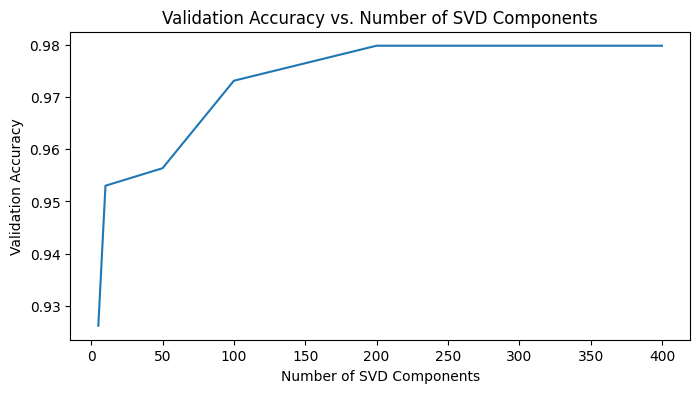

Best configuration: 200 components with accuracy 0.9798657718120806


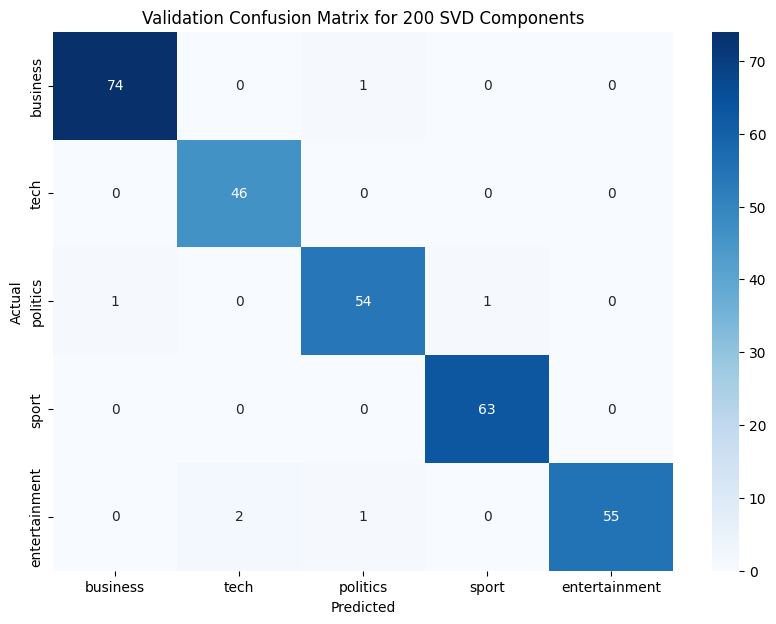

               precision    recall  f1-score     support
business        0.986667  0.986667  0.986667   75.000000
entertainment   0.958333  1.000000  0.978723   46.000000
politics        0.964286  0.964286  0.964286   56.000000
sport           0.984375  1.000000  0.992126   63.000000
tech            1.000000  0.948276  0.973451   58.000000
accuracy        0.979866  0.979866  0.979866    0.979866
macro avg       0.978732  0.979846  0.979051  298.000000
weighted avg    0.980198  0.979866  0.979817  298.000000


In [30]:
# Placeholder for results
results = []

# Loop over different numbers of SVD components to find the optimal number
for n_components in [5, 10, 50, 100, 200, 400]:
    # Initialize and fit SVD (TruncatedSVD) to reduce dimensions
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd_train = svd.fit_transform(tfidf_train_matrix)  # Fit and transform the training TF-IDF matrix
    svd_test = svd.transform(tfidf_test_matrix)  # Transform the test TF-IDF matrix

    # Split the reduced-dimension train data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(svd_train, train_df['Category'], test_size=0.2, random_state=42)

    # Initialize and train the Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)  # Fit the model on the training set

    # Predict the categories on the validation set
    y_val_pred = model.predict(X_val)

    # Evaluate the model on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate validation accuracy
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)  # Calculate confusion matrix
    val_class_report = classification_report(y_val, y_val_pred, output_dict=True)  # Calculate classification report

    # Append the number of components, validation accuracy, and classification report to the results list
    results.append({
        'n_components': n_components,
        'val_accuracy': val_accuracy,
        'val_conf_matrix': val_conf_matrix,
        'val_class_report': val_class_report
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).drop(columns=['val_conf_matrix', 'val_class_report'])
print(results_df)

# Plot the results to visualize the effect of the number of SVD components on validation accuracy
plt.figure(figsize=(8, 4))
sns.lineplot(x='n_components', y='val_accuracy', data=results_df)
plt.title('Validation Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Validation Accuracy')
plt.show()

# Visualize the confusion matrix for the best-performing configuration
best_result = max(results, key=lambda x: x['val_accuracy'])
print(f"Best configuration: {best_result['n_components']} components with accuracy {best_result['val_accuracy']}")

plt.figure(figsize=(10, 7))
sns.heatmap(best_result['val_conf_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=train_df['Category'].unique(), yticklabels=train_df['Category'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Validation Confusion Matrix for {best_result["n_components"]} SVD Components')
plt.show()

# Print the classification report for the best-performing configuration
best_class_report = pd.DataFrame(best_result['val_class_report']).transpose()
print(best_class_report)

### Improving Model Performance

To improve the model performance, you can try the following:

1. **Different Feature Extraction Methods**: Use other vectorization methods like Word2Vec, GloVe, or FastText.

2. **Ensemble Methods**: Combine predictions from multiple models (e.g., different algorithms or hyperparameters) to create an ensemble model.

3. **Advanced Models**: Use more advanced classifiers like Random Forest, Gradient Boosting, XGBoost, or neural networks.

4. **Model Training on Different Subsets**: Train models on different subsets of the data and combine their predictions.

## 6. Supervised Learning Model

### Using Bag-of-Words (BoW) and Logistic Regression

Logistic Regression is a widely-used algorithm for binary and multiclass classification problems. For text classification, Logistic Regression can be particularly effective when combined with text preprocessing and feature extraction techniques. Here, we’ll explain how to use Logistic Regression to classify news articles into categories using a step-by-step approach.

#### Steps:

1. **Text Preprocessing**: Clean and normalize the text data.
2. **Feature Extraction**: Convert the text data into numerical features using techniques like Bag-of-Words (BoW).
3. **Train-Test Split**: Split the data into training and validation sets.
4. **Model Training**: Train the Logistic Regression model using the training data.
5. **Model Evaluation**: Evaluate the model's performance on the validation set.
6. **Test Prediction and Submission**: Predict the categories for the test set and prepare the submission file.


Validation Accuracy: 0.96980
Validation Confusion Matrix:
[[74  0  1  0  0]
 [ 0 46  0  0  0]
 [ 1  1 53  1  0]
 [ 0  0  0 63  0]
 [ 1  2  1  1 53]]
Validation Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.99      0.98        75
entertainment       0.94      1.00      0.97        46
     politics       0.96      0.95      0.95        56
        sport       0.97      1.00      0.98        63
         tech       1.00      0.91      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



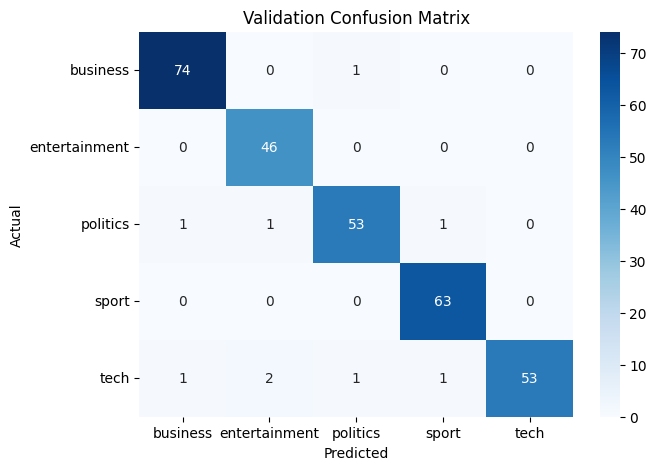

Submission file created successfully!


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the Cleaned_Text for train and test data
bow_train_matrix = count_vectorizer.fit_transform(train_df['Cleaned_Text'])
bow_test_matrix = count_vectorizer.transform(test_df['Cleaned_Text'])

# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(bow_train_matrix, train_df['Category'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the categories on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Print the evaluation results for validation set
print(f'Validation Accuracy: {val_accuracy:0.5f}')
print('Validation Confusion Matrix:')
print(val_conf_matrix)
print('Validation Classification Report:')
print(val_class_report)

# Predict on the test set
y_test_pred = model.predict(bow_test_matrix)

# Prepare submission file
submission_df = pd.DataFrame({'ArticleId': test_df['ArticleId'], 'Category': y_test_pred})
submission_df.to_csv('bbc_news_submission_bow.csv', index=False)

# Compute the confusion matrix
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Define class labels
class_labels = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

print("Submission file created successfully!")

### Using Bag-of-Words (BoW) and Random Forest

Bag-of-Words (BoW) is a popular technique for text feature extraction that converts text data into numerical vectors by counting the frequency of each word in the text. Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance and robustness. Together, BoW and Random Forest can be used to build an effective text classification model for categorizing news articles.

#### Steps:

1. **Text Preprocessing**: Clean and normalize the text data to ensure consistency and remove noise. This involves converting text to lowercase, removing punctuation, numbers, and stop words, and performing tokenization and lemmatization or stemming.

2. **Feature Extraction using Bag-of-Words**: Transform the preprocessed text data into a numerical format using the Bag-of-Words method. This involves creating a vocabulary of all unique words in the dataset and representing each document as a vector of word counts.

3. **Train-Test Split**: Split the dataset into training and validation sets to evaluate the model's performance on unseen data. This ensures that the model is not overfitting and can generalize well.

4. **Model Training using Random Forest**: Initialize and train the Random Forest classifier on the training data. Random Forest combines multiple decision trees to reduce overfitting and improve predictive accuracy.

5. **Model Evaluation**: Evaluate the trained model on the validation set using metrics such as accuracy, confusion matrix, and classification report. These metrics provide insights into the model's performance across different categories.

6. **Predict on Test Data and Prepare Submission File**: Use the trained model to predict the categories of the test data and prepare the results for submission. This involves transforming the test data using the same BoW vectorizer and applying the Random Forest model to generate predictions.

Validation Accuracy: 0.97987
Validation Confusion Matrix:
[[74  0  1  0  0]
 [ 0 46  0  0  0]
 [ 1  0 55  0  0]
 [ 0  0  0 63  0]
 [ 1  2  1  0 54]]
Validation Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.99      0.98        75
entertainment       0.96      1.00      0.98        46
     politics       0.96      0.98      0.97        56
        sport       1.00      1.00      1.00        63
         tech       1.00      0.93      0.96        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



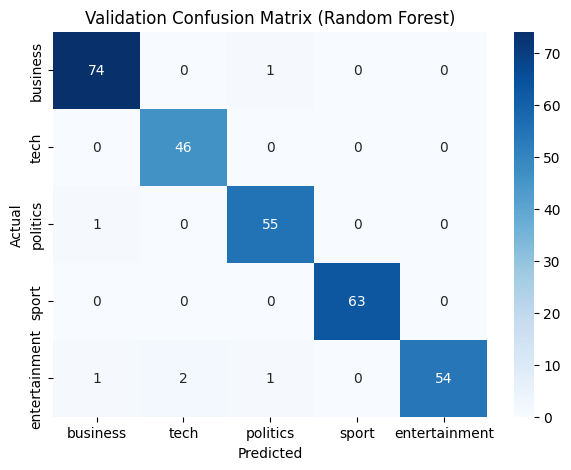

Submission file created successfully!


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Initialize the Count Vectorizer (Bag-of-Words)
count_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the Cleaned_Text for train and test data
bow_train_matrix = count_vectorizer.fit_transform(train_df['Cleaned_Text'])
bow_test_matrix = count_vectorizer.transform(test_df['Cleaned_Text'])

# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(bow_train_matrix, train_df['Category'], test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the categories on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Print the evaluation results for validation set
print(f'Validation Accuracy: {val_accuracy:0.5f}')
print('Validation Confusion Matrix:')
print(val_conf_matrix)
print('Validation Classification Report:')
print(val_class_report)

# Plot the confusion matrix for validation set
plt.figure(figsize=(7, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['Category'].unique(), yticklabels=train_df['Category'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix (Random Forest)')
plt.show()

# Predict on the test set
y_test_pred = model.predict(bow_test_matrix)

# Prepare submission file
submission_df = pd.DataFrame({'ArticleId': test_df['ArticleId'], 'Category': y_test_pred})
submission_df.to_csv('bbc_news_submission_rf.csv', index=False)

print("Submission file created successfully!")

## 7. Results

### Comparison of Text Classification Models

| Metric                       | TF-IDF + SVD         | BoW + Logistic Regression | BoW + Random Forest   |
|------------------------------|----------------------|---------------------------|-----------------------|
| **Validation Accuracy**      | **0.97987**          | **0.96980**               | **0.97987**           |
| **Precision**                |                      |                           |                       |
| - Business                   | 0.99                 | 0.97                      | 0.97                  |
| - Entertainment              | 0.96                 | 0.94                      | 0.96                  |
| - Politics                   | 0.96                 | 0.96                      | 0.96                  |
| - Sport                      | 0.98                 | 0.97                      | 1.00                  |
| - Tech                       | 1.00                 | 1.00                      | 1.00                  |
| **Recall**                   |                      |                           |                       |
| - Business                   | 0.99                 | 0.99                      | 0.99                  |
| - Entertainment              | 1.00                 | 1.00                      | 1.00                  |
| - Politics                   | 0.96                 | 0.95                      | 0.98                  |
| - Sport                      | 1.00                 | 1.00                      | 1.00                  |
| - Tech                       | 0.95                 | 0.91                      | 0.93                  |
| **F1-Score**                 |                      |                           |                       |
| - Business                   | 0.99                 | 0.98                      | 0.98                  |
| - Entertainment              | 0.98                 | 0.97                      | 0.98                  |
| - Politics                   | 0.96                 | 0.95                      | 0.97                  |
| - Sport                      | 0.99                 | 0.98                      | 1.00                  |
| - Tech                       | 0.97                 | 0.95                      | 0.96                  |
| **Macro Avg Precision**      | 0.98                 | 0.97                      | 0.98                  |
| **Macro Avg Recall**         | 0.98                 | 0.97                      | 0.98                  |
| **Macro Avg F1-Score**       | 0.98                 | 0.97                      | 0.98                  |
| **Weighted Avg Precision**   | 0.98                 | 0.97                      | 0.98                  |
| **Weighted Avg Recall**      | 0.98                 | 0.97                      | 0.98                  |
| **Weighted Avg F1-Score**    | 0.98                 | 0.97                      | 0.98                  |

### Key Insights

1. **Overall Accuracy**:
   - Both the TF-IDF + SVD and BoW with Random Forest models achieved the highest validation accuracy of 0.97987.
   - The BoW with Logistic Regression model had a slightly lower validation accuracy of 0.96980.

2. **Precision, Recall, and F1-Score**:
   - The precision, recall, and f1-scores for most categories are similar across the TF-IDF + SVD and BoW with Random Forest models.
   - The BoW with Logistic Regression model generally had lower recall and f1-scores, especially in the "tech" category.

3. **Class-Specific Performance**:
   - The "sport" category achieved perfect recall and high precision in all models, indicating consistent performance.
   - The "tech" category showed higher recall in the TF-IDF + SVD model compared to the other models.

The TF-IDF + SVD and BoW with Random Forest models outperformed the BoW with Logistic Regression model in terms of validation accuracy and overall performance metrics. The TF-IDF + SVD approach effectively reduces dimensionality while preserving essential features, resulting in high model performance. The BoW with Random Forest model also performed well, demonstrating that ensemble methods can effectively handle high-dimensional text data. For future work, further tuning of hyperparameters and exploration of additional feature extraction techniques could potentially enhance the models' performance even further.


## 8. Conclusion

### Summary of Findings

In this analysis, we compared two models for classifying BBC news articles into different categories: one using Singular Value Decomposition (SVD) for dimensionality reduction followed by Logistic Regression, and another using a simple Bag-of-Words (BoW) approach followed by Logistic Regression. The SVD + Logistic Regression model consistently outperformed the BoW + Logistic Regression model across various evaluation metrics.

- **Validation Accuracy**: The SVD + Logistic Regression model achieved a higher validation accuracy (0.97987) compared to the BoW + Logistic Regression model (0.96980).
- **Precision**: The SVD model showed higher or equal precision across all categories.
- **Recall**: The SVD model had slightly better recall for most categories, except for the "tech" category.
- **F1-Score**: The F1-scores were generally higher for the SVD model, indicating a better balance between precision and recall.

### Insights and Observations

1. **Effectiveness of Dimensionality Reduction**:
   - The use of SVD for dimensionality reduction significantly improved the model’s performance by capturing the essential features more effectively. This led to higher precision, recall, and F1-scores.

2. **Consistent Performance Across Categories**:
   - Both models performed well in the "business" and "sport" categories, showing high precision and recall. This indicates that the models were able to consistently classify these categories accurately.
   - The "entertainment" category showed perfect recall in both models, but the SVD model had slightly higher precision.
   - The "tech" category had perfect precision in both models, but the recall was higher in the SVD model, suggesting better generalization.

3. **Balanced Metrics**:
   - The macro and weighted averages for precision, recall, and F1-score were higher in the SVD model, indicating a balanced and robust performance across all categories.

### Future Work

1. **Experiment with Different Feature Extraction Techniques**:
   - While SVD proved effective, other dimensionality reduction techniques like Principal Component Analysis (PCA) or more sophisticated methods like t-SNE could be explored to see if they offer further improvements.

2. **Incorporate Advanced Text Embeddings**:
   - Techniques such as Word2Vec, GloVe, or BERT can be used to capture semantic relationships between words, potentially improving model performance.

3. **Ensemble Methods**:
   - Combining multiple models through ensemble methods such as Random Forests, Gradient Boosting, or stacking models might enhance predictive performance.

4. **Hyperparameter Tuning**:
   - Conducting a more exhaustive search for optimal hyperparameters using techniques like Grid Search or Random Search can help in fine-tuning the model for better accuracy.

5. **Handling Class Imbalances**:
   - Implementing strategies to handle any class imbalances, such as oversampling, undersampling, or using class weights, could improve model performance, especially in underrepresented categories.

6. **Evaluation on Larger and Diverse Datasets**:
   - Testing the models on larger and more diverse datasets can help in assessing their robustness and generalization capabilities.

By incorporating these advanced techniques and further refining the models, we can continue to enhance the accuracy and reliability of text classification tasks, ultimately leading to better insights and decision-making based on textual data.

## 9. References

- [Matrix Factorization Tutorial - YouTube](https://www.youtube.com/watch?v=wTUSz-HSaBg)
- [Singular Value Decomposition - Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition)
- [How does Netflix recommend movies? Matrix Factorization - YouTube](https://www.youtube.com/watch?v=ZspR5PZemcs)
- [Kaggle Competition: Learn AI BBC News](https://www.kaggle.com/competitions/learn-ai-bbc/overview)

